# Scripts on analysis

## Pair-wise RMSD of the full structure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import MDAnalysis.analysis.encore as encore
import matplotlib
import seaborn as sns

In [ ]:
u = mda.Universe('340K_pierce_simulations/1/mdframe.pdb','340K_pierce_simulations/1/md_corrected.xtc')
v = mda.Universe('370K_pierce_simulations/1/mdframe.pdb','370K_pierce_simulations/1/md_corrected.xtc')
w = mda.Universe('pierce_simulations/1/mdframe.pdb', 'pierce_simulations/1/md_corrected.xtc')

In [ ]:
u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=10, verbose=True)
w.transfer_to_memory(step=100, verbose=True)

In [ ]:
#ces, details = encore.ces([u,v],ncores=50)

In [ ]:
x = np.zeros([len(u.trajectory), len(w.trajectory)])

In [ ]:
for i in range(0,len(u.trajectory)):
    #u.trajectory[i]
    r = rms.RMSD(w, u, select='backbone', ref_frame=i).run()
    x[i,:] = r.rmsd[:,2]

In [ ]:
cmap = matplotlib.cm.get_cmap("jet", 6)
plt.figure(figsize=(12,8))
sns.heatmap(x, cmap = cmap, vmin=0,vmax=6)
plt.xlabel('Mobile-310K')
plt.ylabel('Reference-370K')
plt.title('#1-Frame-wise Backbone RMSD  ($\AA$)')
plt.savefig('prmsd_1_310_370.png',dpi=300)

In [ ]:
x.shape

In [ ]:
t = np.where((x<1.5).any(axis=0))[0].shape[0]/len(w.trajectory)

In [ ]:
name='1'
a='0'
b='1'

In [ ]:
print(name,a,b,str(t)[:4],sep='\t')

In [ ]:
from MDAnalysis.analysis.encore.dimensionality_reduction import DimensionalityReductionMethod as drm

In [ ]:
u = mda.Universe('pierce_simulations/1/mdframe.pdb', 'pierce_simulations/1/md_corrected.xtc')
v = mda.Universe('340K_pierce_simulations/1/mdframe.pdb','340K_pierce_simulations/1/md_corrected.xtc')
w = mda.Universe('370K_pierce_simulations/1/mdframe.pdb','370K_pierce_simulations/1/md_corrected.xtc')


u.transfer_to_memory(step=10, stop=5001,verbose=True)
v.transfer_to_memory(step=10, verbose=True)
w.transfer_to_memory(step=10, verbose=True)

In [ ]:
pc = drm.PrincipalComponentAnalysis(dimension=1,svd_solver='auto')

In [ ]:
dres, details = encore.dres([u,v,w], select='backbone', dimensionality_reduction_method=pc, ncores=10)

In [ ]:
details

## RMSDs of CDR loops only

See this folder for good scripts: /home/akshay/docking/1/.
* Commands.sh: Commands to extract fv and renumber it.
* find_cdrs.ipynb: Find the cdr regions of renumbered antibodies
* get_fv_lengths: find the fv length of the antibody chains

### Tests

In [ ]:
import pyrosetta as py
import numpy as np
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
py.init()

pose = py.pose_from_pdb('2FJG_fv_chothia.pdb')
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

light_length = len(pose.chain_sequence(1))
cdr_selector = CDRResidueSelector(ab_info)
sele = np.array(cdr_selector.apply(pose))
sele = np.where(sele)[0] + 1
#sele[sele > light_length] = sele[sele > light_length] - light_length

In [2]:
for i in ab_info.get_all_cdrs():
    print(type(i))

<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>
<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>
<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>
<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>
<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>
<class 'pyrosetta.rosetta.protocols.antibody.CDRNameEnum'>


In [53]:
ab_info.get_all_cdrs()[1]

<CDRNameEnum.h1: 1>

In [4]:
x = ab_info.get_all_cdrs()

In [38]:
py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector?

Docstring:      Select CDR residues.
Init docstring:
__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector) -> None

2. __init__(self: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector, ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo) -> None

3. __init__(self: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector, ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo, cdrs: pyrosetta.rosetta.utility.vector1_protocols_antibody_CDRNameEnum) -> None

4. __init__(self: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector, ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo, cdrs: pyrosetta.rosetta.utility.vector1_bool) -> None

5. __init__(self: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector, arg0: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector) -> None

6. __init__(self

In [54]:
py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, py.rosetta.protocols.antibody.h1)

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector()
    2. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo)
    3. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo, cdrs: pyrosetta.rosetta.utility.vector1_protocols_antibody_CDRNameEnum)
    4. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info: pyrosetta.rosetta.protocols.antibody.AntibodyInfo, cdrs: pyrosetta.rosetta.utility.vector1_bool)
    5. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(arg0: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector)
    6. pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(arg0: pyrosetta.rosetta.protocols.antibody.residue_selector.CDRResidueSelector)

Invoked with: <pyrosetta.rosetta.protocols.antibody.AntibodyInfo object at 0x7f0b9aecafb0>, <CDRNameEnum.h1: 1>

In [75]:
x = py.rosetta.protocols.antibody.H1

In [76]:
x

<CDRNameEnum.h1: 1>

In [7]:
vec = py.rosetta.utility.vector1_bool(6)

In [8]:
vec

vector1_bool[0, 0, 0, 0, 0, 0]

In [9]:
type(vec)

pyrosetta.rosetta.utility.vector1_bool

In [61]:
vec[x] = True

In [24]:
py.rosetta.protocols.antibody.CDRNameEnum.h1

<CDRNameEnum.h1: 1>

In [15]:
cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)

In [16]:
np.where(cdr_sel.apply(pose))

(array([], dtype=int64),)

In [17]:
cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, x)
np.where(cdr_sel.apply(pose))

(array([ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 168, 169, 170, 171, 172,
        173, 174, 175]),)

In [23]:
sele

array([ 23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 169, 170, 171, 172, 173,
       174, 175, 176, 209, 210, 211, 212, 213, 214, 215, 216, 217])

In [24]:
sele[sele > light_length] = sele[sele > light_length] - light_length

In [25]:
sele

array([ 23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  49,  50,  51,  52,  53,
        54,  55,  56,  89,  90,  91,  92,  93,  94,  95,  96,  97])

In [26]:
y = 'H1'

In [29]:
getattr(antibody,y)

<CDRNameEnum.h1: 1>

In [1]:
import pyrosetta as py
import numpy as np
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
py.init('-out:level 0')

pose = py.pose_from_pdb('2FJG_fv_chothia.pdb')
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

#cdr='h1'
#vec = py.rosetta.utility.vector1_bool(6)
#vec[getattr(antibody,cdr)] = True
vec = ab_info.get_all_cdrs()
cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
selection = np.where(cdr_sel.apply(pose))[0] + 1

/tmp/ipykernel_250621/2548576014.py:4: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.antibody.residue_selector import CDRResidueSelector


PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [18]:
type(ab_info.get_AntibodyFrameworkInfo())

pyrosetta.rosetta.utility.vector1_utility_vector1_protocols_antibody_FrameWork_std_allocator_protocols_antibody_FrameWork_t

In [34]:
vec[antibody.h1] = True

In [37]:
vec

vector1_protocols_antibody_CDRNameEnum[1, 2, 3, 4, 5, 6]

In [42]:
selection

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),)

In [38]:
a='xcv'
b='asdfa'

In [40]:
a += a

In [60]:
resids = ''
for i in np.where(cdr_sel.apply(pose))[0] + 1:
    resids += 'resid ' + str(i) + ' or '
selection = 'name CA and (' + resids[:-4] +')'

In [53]:
x = []

In [54]:
x += 'a ' + str(0) + ' b '

In [51]:
x += x

In [52]:
x

'a 0 b a 0 b '

In [36]:
'name CA and selection[0]

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

### Test code to calculate loop rmsds directly

In [1]:
import matplotlib
import numpy as np
import MDAnalysis as mda
import seaborn as sns
import pyrosetta as py
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms
import MDAnalysis.analysis.encore as encore
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
py.init('-out:level 0')

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


/tmp/ipykernel_426598/901955414.py:10: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.antibody.residue_selector import CDRResidueSelector


In [2]:
pose = py.pose_from_pdb('analysis/loop_rmsd/test/2FJG_fv_chothia.pdb')
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

cdr='l1'
vec = py.rosetta.utility.vector1_bool(6)
vec[getattr(antibody,cdr)] = True
#vec = ab_info.get_all_cdrs()
cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
where = np.where(cdr_sel.apply(pose))

In [6]:
u = mda.Universe('340K_pierce_simulations/1/mdframe.pdb','340K_pierce_simulations/1/md_corrected.xtc')
#u = mda.Universe('analysis/loop_rmsd/test/2FJG_fv_chothia.pdb','analysis/loop_rmsd/test/2FJG_fv_chothia.pdb')
v = mda.Universe('370K_pierce_simulations/1/mdframe.pdb','370K_pierce_simulations/1/md_corrected.xtc')
#v = mda.Universe('pierce_simulations/1/mdframe.pdb', 'pierce_simulations/1/md_corrected.xtc')

In [7]:
u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=100, verbose=True)
#w.transfer_to_memory(step=100, verbose=True)

Loading frames:   0%|          | 0/501 [00:00<?, ?it/s]

Loading frames:   0%|          | 0/51 [00:00<?, ?it/s]

In [9]:
# if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    v_framework = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    v_loop = v.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    v_framework = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_loop = v.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_framework = np.concatenate((framework1,framework2))
    
resids = ''
for i in v_framework:
    resids += 'resindex ' + str(i) + ' or '
v_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in v_loop:
    resids += 'resindex ' + str(i) + ' or '
v_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

IndentationError: unexpected indent (1931156011.py, line 2)

In [53]:
if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    u_framework = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    u_loop = u.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    u_framework = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_loop = u.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_framework = np.concatenate((framework1,framework2))
    
resids = ''
for i in u_framework:
    resids += 'resindex ' + str(i) + ' or '
u_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in u_loop:
    resids += 'resindex ' + str(i) + ' or '
u_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

In [54]:
v_loop_selection

'not name O and (backbone and (resindex 241 or resindex 242 or resindex 243 or resindex 244 or resindex 245 or resindex 246 or resindex 247 or resindex 248 or resindex 249 or resindex 250 or resindex 251))'

In [55]:
u_loop_selection

'not name O and (backbone and (resindex 143 or resindex 144 or resindex 145 or resindex 146 or resindex 147 or resindex 148 or resindex 149 or resindex 150 or resindex 151 or resindex 152 or resindex 153))'

In [57]:
v_framework_selection

'not name O and (backbone and (resindex 224 or resindex 225 or resindex 226 or resindex 227 or resindex 228 or resindex 229 or resindex 230 or resindex 231 or resindex 232 or resindex 233 or resindex 234 or resindex 235 or resindex 236 or resindex 237 or resindex 255 or resindex 256 or resindex 257 or resindex 258 or resindex 259 or resindex 260 or resindex 261 or resindex 293 or resindex 294 or resindex 295 or resindex 296 or resindex 297 or resindex 298 or resindex 299 or resindex 300 or resindex 301 or resindex 302 or resindex 318 or resindex 319 or resindex 320 or resindex 321 or resindex 322 or resindex 323 or resindex 324))'

In [58]:
u_framework_selection

'not name O and (backbone and (resindex 126 or resindex 127 or resindex 128 or resindex 129 or resindex 130 or resindex 131 or resindex 132 or resindex 133 or resindex 134 or resindex 135 or resindex 136 or resindex 137 or resindex 138 or resindex 139 or resindex 157 or resindex 158 or resindex 159 or resindex 160 or resindex 161 or resindex 162 or resindex 163 or resindex 195 or resindex 196 or resindex 197 or resindex 198 or resindex 199 or resindex 200 or resindex 201 or resindex 202 or resindex 203 or resindex 204 or resindex 220 or resindex 221 or resindex 222 or resindex 223 or resindex 224 or resindex 225 or resindex 226))'

In [60]:
x = np.zeros([len(u.trajectory), len(v.trajectory)])
y = np.zeros([len(u.trajectory), len(v.trajectory)])

for i in range(0,len(u.trajectory)):
    #u.trajectory[i]
    r = rms.RMSD(v, u, select=(v_framework_selection,u_framework_selection), ref_frame=i, groupselections=[u_loop_selection]).run()
    x[i,:] = r.rmsd[:,2]
    y[i,:] = r.rmsd[:,3]

/home/akshay/apps/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


Text(0.5, 1.0, '#1-Frame-wise Backbone RMSD  ($\\AA$)')

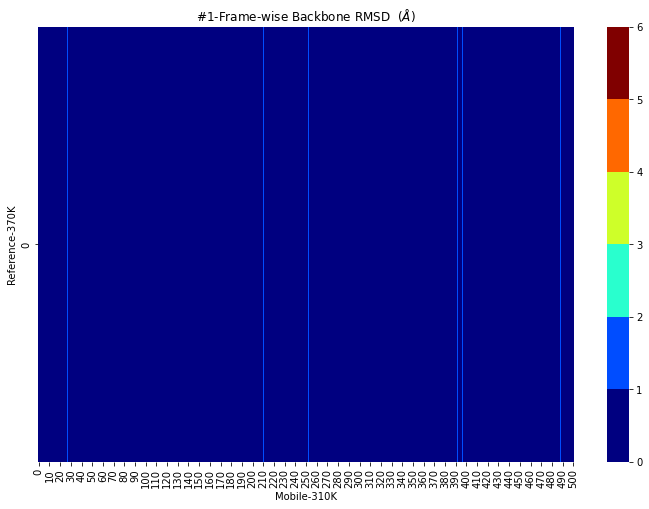

In [61]:
cmap = matplotlib.cm.get_cmap("jet", 6)
plt.figure(figsize=(12,8))
sns.heatmap(x, cmap = cmap, vmin=0,vmax=6)
plt.xlabel('Mobile-310K')
plt.ylabel('Reference-370K')
plt.title('#1-Frame-wise Backbone RMSD  ($\AA$)')
#plt.savefig('prmsd_1_310_370.png',dpi=300)

Text(0.5, 1.0, '#1-Frame-wise Backbone RMSD  ($\\AA$)')

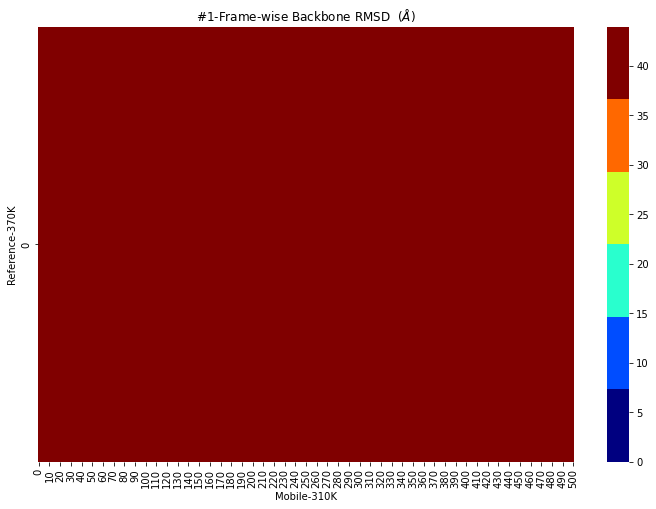

In [63]:
cmap = matplotlib.cm.get_cmap("jet", 6)
plt.figure(figsize=(12,8))
sns.heatmap(y, cmap = cmap, vmin=0)
plt.xlabel('Mobile-310K')
plt.ylabel('Reference-370K')
plt.title('#1-Frame-wise Backbone RMSD  ($\AA$)')
#plt.savefig('prmsd_1_310_370.png',dpi=300)

### Test code to calculate loop rmsds by first aligning separately

In [1]:
import matplotlib
import numpy as np
import MDAnalysis as mda
import seaborn as sns
import pyrosetta as py
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align
import MDAnalysis.analysis.encore as encore
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
py.init('-out:level 0')

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


/tmp/ipykernel_334328/3280448234.py:11: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.antibody.residue_selector import CDRResidueSelector


In [9]:
pose = py.pose_from_pdb('2FJG_fv_chothia.pdb')
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

cdr='l2'
vec = py.rosetta.utility.vector1_bool(6)
vec[getattr(antibody,cdr)] = True
#vec = ab_info.get_all_cdrs()
cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
where = np.where(cdr_sel.apply(pose))

In [24]:
#u = mda.Universe('340K_pierce_simulations/1/mdframe.pdb','340K_pierce_simulations/1/md_corrected.xtc')
u = mda.Universe('2FJG_fv_chothia.pdb','2FJG_fv_chothia.pdb')
v = mda.Universe('370K_pierce_simulations/1/mdframe.pdb','370K_pierce_simulations/1/md_corrected.xtc')
#v = mda.Universe('pierce_simulations/1/mdframe.pdb', 'pierce_simulations/1/md_corrected.xtc')

In [25]:
u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=10, verbose=True)
#w.transfer_to_memory(step=100, verbose=True)

Loading frames:   0%|          | 0/1 [00:00<?, ?it/s]

Loading frames:   0%|          | 0/501 [00:00<?, ?it/s]

In [26]:
if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    v_framework = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    v_loop = v.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    v_framework = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_loop = v.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_framework = np.concatenate((framework1,framework2))
    
resids = ''
for i in v_framework:
    resids += 'resindex ' + str(i) + ' or '
v_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in v_loop:
    resids += 'resindex ' + str(i) + ' or '
v_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

In [27]:
if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    u_framework = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    u_loop = u.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    u_framework = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_loop = u.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_framework = np.concatenate((framework1,framework2))
    
resids = ''
for i in u_framework:
    resids += 'resindex ' + str(i) + ' or '
u_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in u_loop:
    resids += 'resindex ' + str(i) + ' or '
u_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

In [28]:
z = align.AlignTraj(v,u,select=(v_framework_selection,u_framework_selection),verbose=True).run()

  0%|          | 0/501 [00:00<?, ?it/s]

In [29]:
u_loop_position = u.select_atoms(u_loop_selection).positions
a = []
for _ in v.trajectory:
    a.append(rms.rmsd(v.select_atoms(v_loop_selection).positions, u_loop_position, center=False, superposition=False))

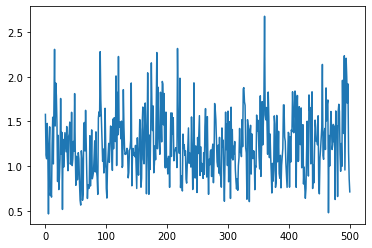

In [30]:
plt.plot(a)

In [ ]:
x = np.zeros([len(u.trajectory), len(v.trajectory)])
y = np.zeros([len(u.trajectory), len(v.trajectory)])

for i in range(0,len(u.trajectory)):
    #u.trajectory[i]
    r = rms.RMSD(v, u, select=(v_framework_selection,u_framework_selection), ref_frame=i, groupselections=[u_loop_selection]).run()
    x[i,:] = r.rmsd[:,2]
    y[i,:] = r.rmsd[:,3]

### Actual code to find loop rmsds between trajectories

In [21]:
'''
Calculate the RMSD of the loops between trajectories. Supported loops are h/l1-3, heavy,light, all.
NOTE THAT SELECTIONS HAVE TO BE EQUIVALENT.
'''

import sys
import matplotlib
import numpy as np
import MDAnalysis as mda
import pyrosetta as py
from MDAnalysis.analysis import rms
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
import matplotlib.pyplot as plt
import seaborn as sns
cmap = matplotlib.cm.get_cmap("jet", 6)
py.init('-out:level 0')

ref_top = '340K_pierce_simulations/9/mdframe.pdb'
ref_traj = '340K_pierce_simulations/9/md_corrected.xtc'
mobile_top = 'pierce_simulations/9/mdframe.pdb'
mobile_traj = 'pierce_simulations/9/md_corrected.xtc'
name = '1'
index_ref = 340
index_mob = 310
rmsd_val = 1
renumbered_pdb = 'pierce_simulations/9/fv_chothia.pdb'
cdr = 'h3'

pose = py.pose_from_pdb(renumbered_pdb)
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

if cdr == 'all':
    vec = ab_info.get_all_cdrs()
elif cdr == 'heavy':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.h1] = True
    vec[antibody.h2] = True
    vec[antibody.h3] = True

elif cdr == 'light':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.l1] = True
    vec[antibody.l2] = True
    vec[antibody.l3] = True

else:
    vec = py.rosetta.utility.vector1_bool(6)
    vec[getattr(antibody,cdr)] = True

cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
where = np.where(cdr_sel.apply(pose))

u = mda.Universe(ref_top,ref_traj)
v = mda.Universe(mobile_top,mobile_traj)

u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=100,verbose=True)

if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    x = 0
    framework = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    loop = u.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    x = 1
    framework = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    loop = u.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    framework = np.concatenate((framework1,framework2))

resids = ''
for i in framework:
    resids += 'resindex ' + str(i) + ' or '
framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in loop:
    resids += 'resindex ' + str(i) + ' or '
loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'
    
frmsd = np.zeros([len(u.trajectory), len(v.trajectory)]) #framework rmsd
lrmsd = np.zeros([len(u.trajectory), len(v.trajectory)]) # loop rmsd

for i in range(0,len(u.trajectory)):
    r = rms.RMSD(v, u, select=framework_selection, ref_frame=i, groupselections=[loop_selection]).run()
    frmsd[i,:] = r.rmsd[:,2]
    lrmsd[i,:] = r.rmsd[:,3]

match = np.where((lrmsd<float(rmsd_val)).any(axis=1))[0].shape[0]/len(v.trajectory)
print(name,index_ref,index_mob,cdr,rmsd_val,str(match)[:4],sep='\t')

plt.figure(figsize=(12,8))
sns.heatmap(lrmsd, cmap = cmap, vmin=0,vmax=6)
plt.xlabel('Mobile-'+str(index_mob))
plt.ylabel('Reference-'+str(index_ref))
plt.title(str(name)+' Frame-wise RMSD  ($\AA$) '+str(cdr))
plt.savefig("{}_lrmsd_{}_{}_{}.png".format(name,index_ref,index_mob,cdr),dpi=300, facecolor='white',bbox_inches='tight')

plt.figure(figsize=(12,8))
sns.heatmap(frmsd, cmap = cmap, vmin=0,vmax=6)
plt.xlabel('Mobile-'+str(index_mob))
plt.ylabel('Reference-'+str(index_ref))
plt.title(str(name)+' Frame-wise RMSD  ($\AA$) '+str(cdr))
plt.savefig("{}_frmsd_{}_{}_{}.png".format(name,index_ref,index_mob,cdr),dpi=300, facecolor='white',bbox_inches='tight')

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


RuntimeError: 

File: /home/benchmark/rosetta/source/src/protocols/antibody/AntibodyInfo.cc:791
L1peptide bond geometry issues at loop position 24 L 
Please check pdb for large chainbreaks or missing density.  
Loop modeling applications can be used to close loops or create residues in the loop from missing density. 
You can OVERRIDE this check by passing the flag -check_cdr_chainbreaks false 


### Actual code to find loop rmsd between a trajectory and a pdb

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


Loading frames:   0%|          | 0/1 [00:00<?, ?it/s]

/home/akshay/apps/anaconda3/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


Loading frames:   0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

/home/akshay/apps/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/align.py:719: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


1	0	310	light	2	1.46


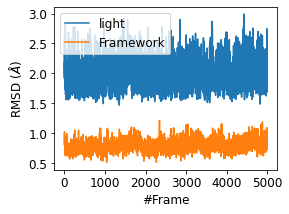

In [18]:
'''
Calculate the RMSD of the loops between a trajectory and a pdb. Supported loops are h/l1-3, heavy,light, all.
Use this when selections are not equivalent.
'''

import sys
import matplotlib
import numpy as np
import MDAnalysis as mda
import pyrosetta as py
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
import matplotlib.pyplot as plt
py.init('-out:level 0')

ref_top = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
ref_traj = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
mobile_top = 'pierce_simulations/1/mdframe.pdb'
mobile_traj = 'pierce_simulations/1/md_corrected.xtc'
name = '1'
index_ref = 0
index_mob = 310
rmsd_val = 2
renumbered_pdb = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
cdr = 'light'

pose = py.pose_from_pdb(renumbered_pdb)
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

if cdr == 'all':
    vec = ab_info.get_all_cdrs()
elif cdr == 'heavy':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.h1] = True
    vec[antibody.h2] = True
    vec[antibody.h3] = True

elif cdr == 'light':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.l1] = True
    vec[antibody.l2] = True
    vec[antibody.l3] = True

else:
    vec = py.rosetta.utility.vector1_bool(6)
    vec[getattr(antibody,cdr)] = True

cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
where = np.where(cdr_sel.apply(pose))

u = mda.Universe(ref_top,ref_traj)
v = mda.Universe(mobile_top,mobile_traj)

u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=10,verbose=True)

if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    v_framework = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    v_loop = v.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    v_framework = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_loop = v.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_framework = np.concatenate((framework1,framework2))
    
resids = ''
for i in v_framework:
    resids += 'resindex ' + str(i) + ' or '
v_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in v_loop:
    resids += 'resindex ' + str(i) + ' or '
v_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'


if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    u_framework = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    u_loop = u.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    u_framework = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_loop = u.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_framework = np.concatenate((framework1,framework2))

resids = ''
for i in u_framework:
    resids += 'resindex ' + str(i) + ' or '
u_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in u_loop:
    resids += 'resindex ' + str(i) + ' or '
u_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

z = align.AlignTraj(v,u,select=(v_framework_selection,u_framework_selection),verbose=True).run()
frmsd = z.rmsd # Framework RMSD

u_loop_position = u.select_atoms(u_loop_selection).positions
lrmsd = [] #loop rmsd
for _ in v.trajectory:
    lrmsd.append(rms.rmsd(v.select_atoms(v_loop_selection).positions, u_loop_position, center=False, superposition=False))

lrmsd = np.array(lrmsd)
print(name,index_ref,index_mob,cdr,rmsd_val,str(lrmsd.min())[:4],sep='\t')

plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '12'
plt.plot(lrmsd)
plt.plot(frmsd)
plt.xlabel('#Frame')
plt.ylabel('RMSD ($\AA$)')
plt.legend([cdr,'Framework'])
#plt.savxefig("{}_nativermsd_{}_{}_{}.png".format(name,index_ref,index_mob,cdr),dpi=300, facecolor='white',bbox_inches='tight')

In [16]:
v_loop+1

array([ 23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [17]:
v_framework+1

array([  6,   7,   8,   9,  10,  11,  12,  39,  40,  41,  42,  43,  44,
        45,  46,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120])

In [19]:
v_loop+1

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 267, 268,
       269, 270, 271, 272, 273, 274, 307, 308, 309, 310, 311, 312, 313,
       314, 315])

In [20]:
v_framework+1

array([225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
       238, 256, 257, 258, 259, 260, 261, 262, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 319, 320, 321, 322, 323, 324, 325])

### Code to find loop rmsds between two pdbs

In [1]:
'''
Calculate the RMSD of the loops between a pdb and a pdb. Supported loops are h/l1-3, heavy,light, all.
Use this when selections are not equivalent.
'''

import sys
import matplotlib
import numpy as np
import MDAnalysis as mda
import pyrosetta as py
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align
from pyrosetta.rosetta.protocols import antibody
from rosetta.protocols.antibody.residue_selector import CDRResidueSelector
import matplotlib.pyplot as plt
py.init('-out:level 0')

ref_top = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
ref_traj = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
mobile_top = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
mobile_traj = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
renumbered_pdb = '/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb'
cdr = 'all'

pose = py.pose_from_pdb(renumbered_pdb)
ab_info = antibody.AntibodyInfo(pose, antibody.Chothia_Scheme, antibody.North)

if cdr == 'all':
    vec = ab_info.get_all_cdrs()
elif cdr == 'heavy':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.h1] = True
    vec[antibody.h2] = True
    vec[antibody.h3] = True

elif cdr == 'light':
    vec = py.rosetta.utility.vector1_bool(6)
    vec[antibody.l1] = True
    vec[antibody.l2] = True
    vec[antibody.l3] = True

else:
    vec = py.rosetta.utility.vector1_bool(6)
    vec[getattr(antibody,cdr)] = True

cdr_sel = py.rosetta.protocols.antibody.residue_selector.CDRResidueSelector(ab_info, vec)
where = np.where(cdr_sel.apply(pose))

u = mda.Universe(ref_top,ref_traj)
v = mda.Universe(mobile_top,mobile_traj)

u.transfer_to_memory(step=10,verbose=True)
v.transfer_to_memory(step=10,verbose=True)

if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    v_framework = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    v_loop = v.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    v_framework = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_loop = v.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((v.segments.resindices[0][5:11+1], v.segments.resindices[0][38:45+1],v.segments.resindices[0][80:90+1],v.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((v.segments.resindices[1][6:19+1], v.segments.resindices[1][37:43+1],v.segments.resindices[1][75:84+1],v.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    v_framework = np.concatenate((framework1,framework2))
    x = len(pose.chain_sequence(1))
    h = where[0][where[0] < x-1]
    l = where[0][where[0] > x-1] - x
    v_looph = v.segments.resindices[0][h]
    v_loopl = v.segments.resindices[1][l]
    v_loop = np.concatenate((v_looph,v_loopl))
    
resids = ''
for i in v_framework:
    resids += 'resindex ' + str(i) + ' or '
v_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in v_loop:
    resids += 'resindex ' + str(i) + ' or '
v_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'


if (cdr == 'h1') or (cdr=='h2') or (cdr=='h3') or (cdr=='heavy'):
    u_framework = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    u_loop = u.segments.resindices[0][where]
elif (cdr == 'l1') or (cdr=='l2') or (cdr=='l3') or (cdr=='light'):
    u_framework = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_loop = u.segments.resindices[1][where[0]-len(pose.chain_sequence(1))]
elif cdr == 'all':
    framework1 = np.concatenate((u.segments.resindices[0][5:11+1], u.segments.resindices[0][38:45+1],u.segments.resindices[0][80:90+1],u.segments.resindices[0][105:len(pose.chain_sequence(1))]))
    framework2 = np.concatenate((u.segments.resindices[1][6:19+1], u.segments.resindices[1][37:43+1],u.segments.resindices[1][75:84+1],u.segments.resindices[1][100:len(pose.chain_sequence(2))]))
    u_framework = np.concatenate((framework1,framework2))
    x = len(pose.chain_sequence(1))
    h = where[0][where[0] < x-1]
    l = where[0][where[0] > x-1] - x
    u_looph = v.segments.resindices[0][h]
    u_loopl = v.segments.resindices[1][l]
    u_loop = np.concatenate((u_looph,u_loopl))
    

resids = ''
for i in u_framework:
    resids += 'resindex ' + str(i) + ' or '
u_framework_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

resids = ''
for i in u_loop:
    resids += 'resindex ' + str(i) + ' or '
u_loop_selection = 'not name O and (backbone and (' + resids[:-4] +'))'

z = align.AlignTraj(v,u,select=(v_framework_selection,u_framework_selection),verbose=True).run()
frmsd = z.rmsd # Framework RMSD

u_loop_position = u.select_atoms(u_loop_selection).positions
lrmsd = [] #loop rmsd
for _ in v.trajectory:
    lrmsd.append(rms.rmsd(v.select_atoms(v_loop_selection).positions, u_loop_position, center=False, superposition=False))

lrmsd = np.array(lrmsd)
print(ref_traj.split('/')[-1][:-4], mobile_traj.split('/')[-1][:-4], cdr,"{:.2f}".format(frmsd[0]),"{:.2f}".format(lrmsd[0]),sep='\t')

/tmp/ipykernel_2847765/1588962876.py:14: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.antibody.residue_selector import CDRResidueSelector


PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python39.Release 2022.37+release.4c51f714cd413ab5625d699da693250e86294a85 2022-09-16T17:05:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


Loading frames:   0%|          | 0/1 [00:00<?, ?it/s]

/home/akshay/apps/anaconda3/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


Loading frames:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

1	1	all	0.00	0.00


/home/akshay/apps/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/align.py:719: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


In [2]:
u_loop+1

array([ 23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 169, 170, 171, 172, 173,
       174, 175, 176])

In [3]:
u_framework+1

array([  6,   7,   8,   9,  10,  11,  12,  39,  40,  41,  42,  43,  44,
        45,  46,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 158, 159, 160, 161, 162, 163, 164, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 221, 222, 223, 224, 225, 226,
       227])

In [26]:
u_loop_selection

'not name O and (backbone and (resindex 22 or resindex 23 or resindex 24 or resindex 25 or resindex 26 or resindex 27 or resindex 28 or resindex 29 or resindex 30 or resindex 31 or resindex 32 or resindex 33 or resindex 34 or resindex 49 or resindex 50 or resindex 51 or resindex 52 or resindex 53 or resindex 54 or resindex 55 or resindex 56 or resindex 57 or resindex 58 or resindex 96 or resindex 97 or resindex 98 or resindex 99 or resindex 100 or resindex 101 or resindex 102 or resindex 103 or resindex 104 or resindex 105 or resindex 106 or resindex 107 or resindex 108 or resindex 143 or resindex 144 or resindex 145 or resindex 146 or resindex 147 or resindex 148 or resindex 149 or resindex 150 or resindex 151 or resindex 152 or resindex 153 or resindex 168 or resindex 169 or resindex 170 or resindex 171 or resindex 172 or resindex 173 or resindex 174 or resindex 175))'

# Test

In [18]:
x = len(pose.chain_sequence(1))

In [22]:
a = where[0][where[0] < x-1]

In [24]:
where[0][where[0] > x-1] - x

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 48, 49, 50, 51, 52, 53,
       54, 55])

In [9]:
p1 = py.pose_from_pdb('/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/1.pdb')
p2 = py.pose_from_pdb('/home/akshay/apo_md/analysis/loop_rmsd_traj-pdb/macrostate_renum_fvs/2.pdb')

In [10]:
antibody.cdr_backbone_rmsds(p1,p2,ab_info,ab_info)

vector1_double[3.35914, 0.768062, 0.983249, 0.629097, 1.85078, 0.855857, 1.37138, 1.81, 1.86305]

In [15]:
antibody.cdr_backbone_rmsds?

Docstring:
cdr_backbone_rmsds(*args, **kwargs)
Overloaded function.

1. cdr_backbone_rmsds(p1: pyrosetta.rosetta.core.pose.Pose, p2: pyrosetta.rosetta.core.pose.Pose, a1: protocols::antibody::AntibodyInfo, a2: protocols::antibody::AntibodyInfo) -> pyrosetta.rosetta.utility.vector1_double

2. cdr_backbone_rmsds(p1: pyrosetta.rosetta.core.pose.Pose, p2: pyrosetta.rosetta.core.pose.Pose, a1: protocols::antibody::AntibodyInfo, a2: protocols::antibody::AntibodyInfo, aln_thresh: int) -> pyrosetta.rosetta.utility.vector1_double

Align two sequence matching antibodies and calculate CDR rmsds (add OCD), then store in scores
 

 vector is made up of:
 OCD
 FRH
 H1 RMS
 H2 RMS
 H3 RMS
 FRL
 L1 RMS
 L2 RMS
 L3 RMS

C++: protocols::antibody::cdr_backbone_rmsds(class core::pose::Pose &, const class core::pose::Pose &, const class std::shared_ptr<class protocols::antibody::AntibodyInfo>, const class std::shared_ptr<class protocols::antibody::AntibodyInfo>, unsigned long) --> class utility::vector1<do

In [14]:

antibody.cdr_energy()

TypeError: cdr_energy(): incompatible function arguments. The following argument types are supported:
    1. (pose: pyrosetta.rosetta.core.pose.Pose, ab_info: protocols::antibody::AntibodyInfo, scorefxn: pyrosetta.rosetta.core.scoring.ScoreFunction, cdr: pyrosetta.rosetta.protocols.antibody.CDRNameEnum) -> float

Invoked with: 